This notebook, generates all the figures included in the paper *Long-term losses in surface water area in the Colorado River Basin*.

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
import matplotlib.colors as mcolors

In [21]:
## Load all data paths needed 
crb_data = pd.read_csv('../Data/analysis-data/huc4_zonal_stats.csv') #zonal statistics for each huc4
crb_huc4 = gpd.read_file('../Data/processed-data/shapefiles/CRB_HUC4.shp')

#Color Labels 
color_total_water = '#440154'
color_perm = '#297a8e' # pixel class = 3
color_seasonal = '#34E4EA' # pixel class = 2
color_nowater = '#e2e418' #pixel class = 1

In [14]:
crb_data.columns

Index(['year', 'huc4', 'huc_name', 'count_total', 'count_permanent',
       'count_seasonal', 'count_nowater', 'count_no_obs', 'count_huc',
       'area_total_water', 'area_permanent', 'area_seasonal', 'area_nowater'],
      dtype='object')

## Time series of inundated area classifications 
We grab the sum of the hucs in the Basin to calculate time series of seasonal, permanent, no water, and totla water (sum of seasonal and permanent). 

In [15]:
huc4_list = list(np.unique(crb_data.huc4))

#list of upper and lower HUCs
upper_hucs = huc4_list[0:8]
lower_hucs = huc4_list[8:15]

#subset the CRB dataset into upper and lower 
upper_df = crb_data[crb_data["huc4"].isin(upper_hucs)]
lower_df = crb_data[crb_data["huc4"].isin(lower_hucs)]

#sum of the CRB 
CRB_sum = crb_data.groupby('year')[['area_total_water', 'area_permanent', 'area_seasonal', 'area_nowater']].sum().reset_index()
#sum of the UCRB 
UCRB_sum = upper_df.groupby('year')[['area_total_water', 'area_permanent', 'area_seasonal', 'area_nowater']].sum().reset_index()
#sum of the LCRB
LCRB_sum = lower_df.groupby('year')[['area_total_water', 'area_permanent', 'area_seasonal', 'area_nowater']].sum().reset_index()

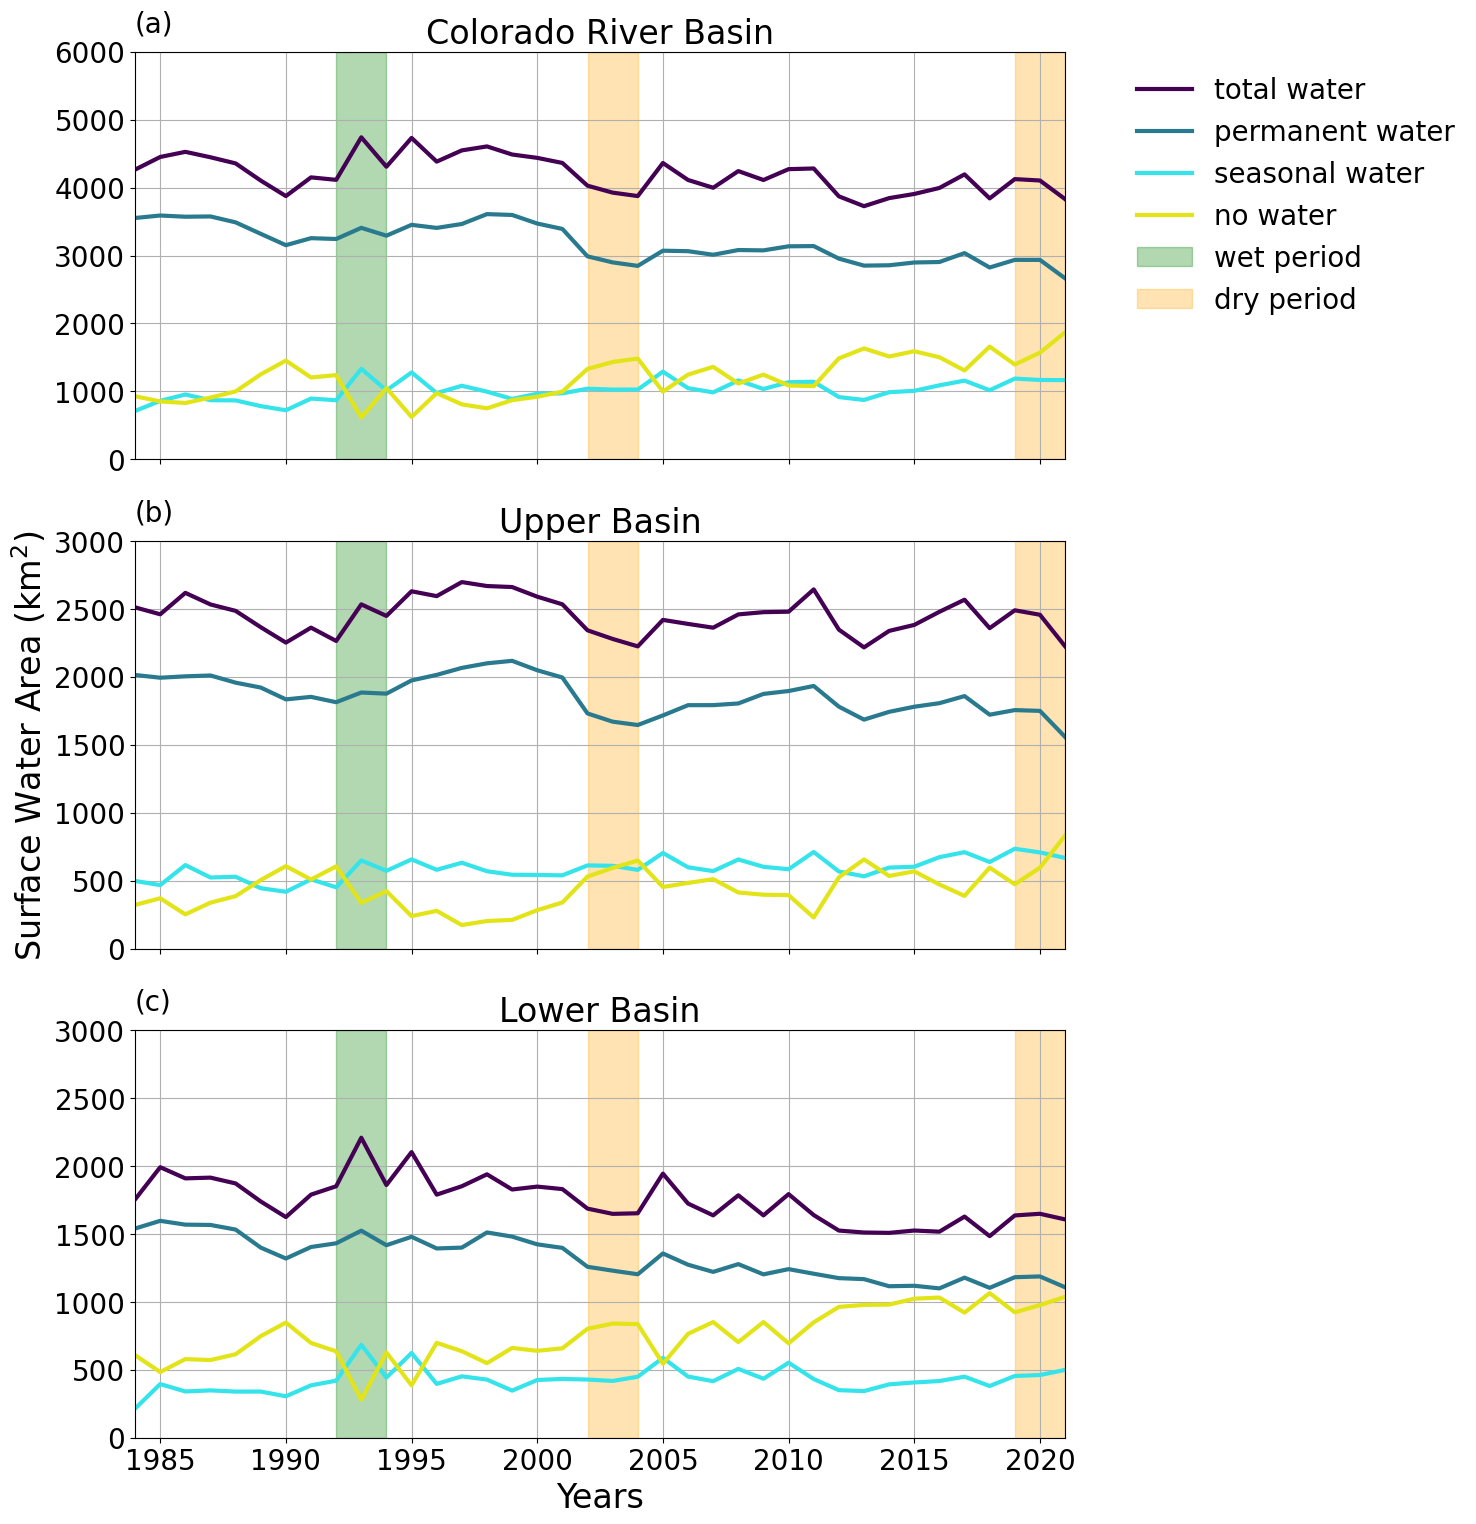

In [19]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(3, figsize = (12,18))
ax[0].plot(CRB_sum['year'], CRB_sum['area_total_water'], color=color_total_water, label = 'total water', linewidth = 3)
ax[0].plot(CRB_sum['year'], CRB_sum['area_permanent'], color=color_perm, label = 'permanent water', linewidth = 3)
ax[0].plot(CRB_sum['year'], CRB_sum['area_seasonal'], color=color_seasonal, label = 'seasonal water', linewidth = 3)
ax[0].plot(CRB_sum['year'], CRB_sum['area_nowater'], color=color_nowater, label = 'no water', linewidth = 3)
ax[0].axvspan(1992, 1994, color = 'green', alpha = 0.3, label = "wet period")
ax[0].axvspan(2002, 2004, color = 'orange', alpha = 0.3, label = "dry period")
ax[0].axvspan(2019, 2021, color = 'orange', alpha = 0.3)
ax[0].set_xticklabels([])
ax[0].set_ylim(0,6000)
ax[0].set_xlim(1984, 2021)
ax[0].grid(True)
ax[0].set_title("Colorado River Basin")
ax[0].legend(bbox_to_anchor=(1.05, 1), frameon=False)
ax[0].text(0, 1.05, '(a)', transform=ax[0].transAxes)


ax[1].plot(UCRB_sum['year'], UCRB_sum['area_total_water'], color=color_total_water, label = 'total', linewidth = 3)
ax[1].plot(UCRB_sum['year'], UCRB_sum['area_permanent'], color=color_perm, label = 'permanent', linewidth = 3)
ax[1].plot(UCRB_sum['year'], UCRB_sum['area_seasonal'], color=color_seasonal, label = 'seasonal', linewidth = 3)
ax[1].plot(UCRB_sum['year'], UCRB_sum['area_nowater'], color=color_nowater, label = 'no water', linewidth = 3)
ax[1].axvspan(1992, 1994, color = 'green', alpha = 0.3)
ax[1].axvspan(2002, 2004, color = 'orange', alpha = 0.3)
ax[1].axvspan(2019, 2021, color = 'orange', alpha = 0.3)
ax[1].set_xticklabels([])
ax[1].set_ylim(0,3000)
ax[1].set_xlim(1984, 2021)
ax[1].grid(True)
ax[1].set_title("Upper Basin")
ax[1].set_ylabel('Surface Water Area (km$^2$)', fontsize = 24)
ax[1].text(0, 1.05, '(b)', transform=ax[1].transAxes)

ax[2].plot(LCRB_sum['year'], LCRB_sum['area_total_water'], color=color_total_water, label = 'total', linewidth = 3)
ax[2].plot(LCRB_sum['year'], LCRB_sum['area_permanent'], color=color_perm, label = 'permanent', linewidth = 3)
ax[2].plot(LCRB_sum['year'], LCRB_sum['area_seasonal'], color=color_seasonal, label = 'seasonal', linewidth = 3)
ax[2].plot(LCRB_sum['year'], LCRB_sum['area_nowater'], color=color_nowater, label = 'no water', linewidth = 3)
ax[2].axvspan(1992, 1994, color = 'green', alpha = 0.3)
ax[2].axvspan(2002, 2004, color = 'orange', alpha = 0.3)
ax[2].axvspan(2019, 2021, color = 'orange', alpha = 0.3)
ax[2].set_ylim(0,3000)
ax[2].set_xlim(1984, 2021)
ax[2].grid(True)
ax[2].set_title("Lower Basin")
ax[2].set_xlabel("Years", fontsize = 24)
ax[2].text(0, 1.05, '(c)', transform=ax[2].transAxes)

plt.savefig('../Results/figures/timeseries-figure4.jpg', bbox_inches ='tight', dpi = 600)


## Net change figure 

## Percent change of total, permanent, and seasonal inundated water areas 
from wet period 1992 - 1994 to end of the study period 2019 - 2021 

In [24]:
transitions_92_19 = pd.read_csv('../Data/analysis-data/water_type_transitions_92_19.csv')

#make the huc id's a string (originally integer)
transitions_92_19['huc4'] = transitions_92_19['huc4'].map(str)
#merge this dataset with the shapefile using the huc4 id's 
huc4_transitions_92_19 = crb_huc4.merge(transitions_92_19, on = 'huc4')

In [25]:
transitions_92_19.columns

Index(['huc4', 'permanent_area_period1', 'seasonal_area_period1',
       'nowater_area_period1', 'permanent_area_period2',
       'seasonal_area_period2', 'nowater_area_period2',
       'perm_nowater_trans_area', 'perm_seasonal_trans_area',
       'seasonal_nowater_trans_area', 'seasonal_perm_trans_area',
       'nowater_seasonal_trans_area', 'nowater_perm_trans_area',
       'dry_transition_area', 'wet_transition_area', 'perm_diff_92_19',
       'total_area_period1', 'total_area_period2', 'season_diff_92_19',
       'total_diff_92_19', 'perm_nowater_perc', 'perm_season_perc',
       'seasonal_nowater_perc', 'seasonal_perm_perc', 'nowater_season_perc',
       'nowater_perm_perc', 'dry_trans_area_perc', 'wet_trans_area_perc'],
      dtype='object')

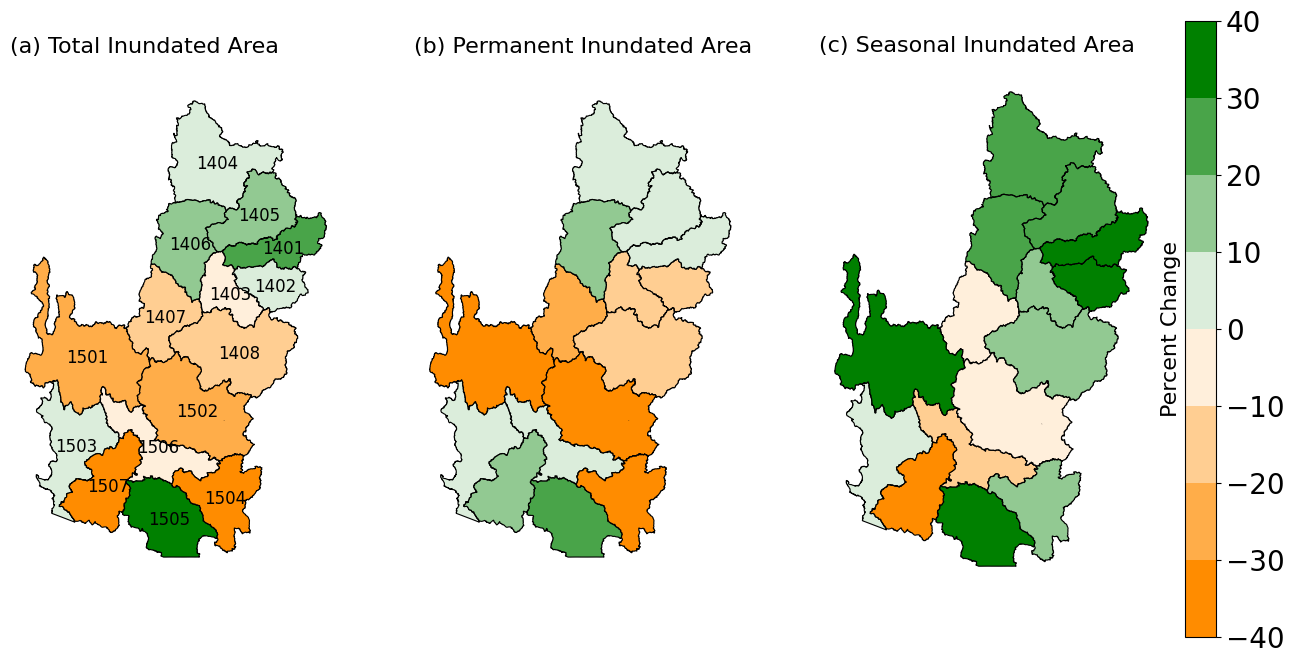

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1, 1.3]})
plt.rcParams.update({'font.size': 20})
cmap_diff = mcolors.LinearSegmentedColormap.from_list('custom_wet', [(0, 'darkorange'), (0.5, 'white'),  (1, 'green')], N = 8)
#limit the color bar 
vmin = -40
vmax = 40
# Plot on the first map
huc4_transitions_92_19.plot(ax=ax[0], column='total_diff_92_19', legend=False, cmap=cmap_diff, linewidth=0.8, edgecolor='0', vmin=vmin, vmax=vmax)
ax[0].axis('off')  # Turn off axis
ax[0].text(0, 1.05, '(a) Total Inundated Area', transform=ax[0].transAxes, fontsize = 16)

huc4_transitions_92_19.plot(ax=ax[1], column='perm_diff_92_19', legend=False, cmap=cmap_diff, linewidth=0.8, edgecolor='0', vmin=vmin, vmax=vmax)
ax[1].axis('off')  # Turn off axis
ax[0].text(0, 1.05, '(b) Permanent Inundated Area', transform=ax[1].transAxes, fontsize = 16)

huc4_transitions_92_19.plot(ax=ax[2], column='season_diff_92_19', legend=True, cmap=cmap_diff, linewidth=0.8, edgecolor='0', vmin=vmin, vmax=vmax)
ax[2].axis('off')  # Turn off axis
ax[2].text(0, 1.03, '(c) Seasonal Inundated Area', transform=ax[2].transAxes, fontsize = 16)
ax[2].text(1.05,0.5, 'Percent Change',horizontalalignment='right',
        verticalalignment='center', rotation='vertical', transform=ax[2].transAxes, fontsize = 16)

for idx, row in huc4_transitions_92_19.iterrows():
    ax[0].text(row.geometry.centroid.x - 0.6, row.geometry.centroid.y - 0.2, 
               row["huc4"], fontsize=12, color='black')

plt.savefig('../Results/figures/percent_change_water_type-figure2.jpg', bbox_inches ='tight', dpi = 600)